# Exercícios 

Utilize os arquivos do **RECLAME AQUI** e crie um dashboard com algumas caracteristicas. 

Empresas: 
- Hapvida
- Nagem
- Ibyte

O painel deve conter tais informações: 

1. Série temporal do número de reclamações. 

2. Frequência de reclamações por estado. 

3. Frequência de cada tipo de **STATUS**

4. Distribuição do tamanho do texto (coluna **DESCRIÇÃO**) 


Alguns botões devem ser implementados no painel para operar filtros dinâmicos. Alguns exemplos:: 

1. Seletor da empresa para ser analisada. 

2. Seletor do estado. 

3. Seletor por **STATUS**

4. Seletor de tamanho do texto 

Faça o deploy da aplicação. Dicas: 

https://www.youtube.com/watch?v=vw0I8i7QJRk&list=PLRFQn2r6xhgcDMhp9NCWMqDYGfeeYsn5m&index=16&t=252s

https://www.youtube.com/watch?v=HKoOBiAaHGg&t=515s

Exemplo do github
https://github.com/jlb-gmail/streamlit_teste


**OBSERVAÇÃO**

A resposta do exercicio é o link do github e o link da aplicação. Coloque-os abaixo.  





In [24]:
import pandas as pd

df_hapvida=pd.read_csv('datasets/RECLAMEAQUI_HAPVIDA.csv')
df_ibyte=pd.read_csv('datasets/RECLAMEAQUI_IBYTE.csv')
df_nagem=pd.read_csv('datasets/RECLAMEAQUI_NAGEM.csv')

empresas = ['Hapvida', 'Ibyte', 'Nagem']

df_hapvida['empresa'] = 'Hapvida'
df_ibyte['empresa'] = 'Ibyte'
df_nagem['empresa'] = 'Nagem'

# junte os dataframes
df = pd.concat([df_hapvida, df_ibyte, df_nagem])

# converte a coluna 'TEMPO' para datetime
df['TEMPO'] = pd.to_datetime(df['TEMPO'])

# cria uma columna com o uf extraindo da coluna 'LOCAL'
df['UF'] = df['LOCAL'].str.extract(r'([A-Z]{2})')

df.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,empresa,UF
0,149490335,TEMPO DE ATENDIMENTO,Recife - PE,2022-01-09,Demora na execução<->Plano<->Planos de Saúde<-...,Não respondida,Acabei de sair de uma urgência por causa de at...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,PE
1,149499817,Hapvida não tem nutrólogo,Salvador - BA,2022-01-09,Planos de saúde<->Qualidade do serviço prestad...,Não respondida,O Hapvida diz que fornece o serviço de nutrólo...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,BA
2,149498293,Descaso de tratamento de Hemodiálise,Olinda - PE,2022-01-09,"Demora para autorização de consultas, exames e...",Respondida,"Meu irmão Wagner Santiago, estava internado de...",https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,PE
3,149495455,DESORGANIZAÇÃO E FALTA DE RESOLUÇÃO DE PROBLEMA,Goiânia - GO,2022-01-09,Demora na execução<->Planos de saúde<->Planos ...,Não respondida,Agendei pelo chat um procedimento onde fui bem...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,GO
4,149495285,Liberação de Procedimento,Fortaleza - CE,2022-01-09,Planos de saúde<->Planos de Saúde<->Hapvida Sa...,Respondida,Paguei fatura do plano em atraso e tal atraso ...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,Hapvida,CE


In [25]:
#frequencia de cada tipo de status por empresa
df.groupby('empresa')['STATUS'].value_counts()

empresa  STATUS        
Hapvida  Não respondida    639
         Respondida        271
         Resolvido          67
         Em réplica         36
         Não resolvido       3
Ibyte    Resolvido         430
         Respondida        339
         Em réplica        124
         Não resolvido     103
         Não respondida      4
Nagem    Respondida        440
         Resolvido         238
         Em réplica        174
         Não resolvido     147
         Não respondida      1
Name: STATUS, dtype: int64

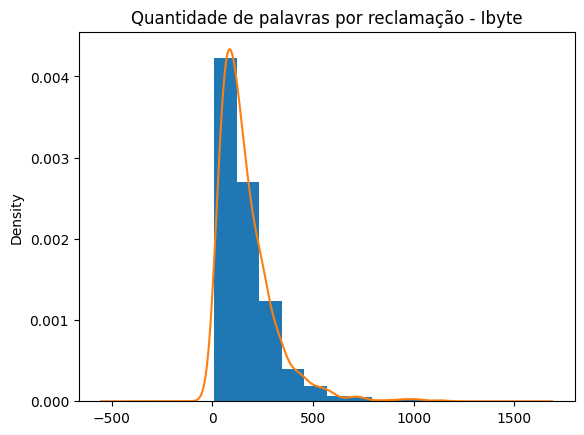

In [35]:
# crie uma funcao para calcular  a quantidade de palavrs de um texto
def conta_palavras(texto):
    return len(texto.split())

def plotar_histograma_por_empresa(empresa):
    df[df['empresa'] == empresa]['DESCRICAO'].apply(conta_palavras).plot(kind='hist', density=True, label=empresa, title=f'Quantidade de palavras por reclamação - {empresa}')
    df[df['empresa'] == empresa]['DESCRICAO'].apply(conta_palavras).plot.kde()

# plotar_histograma_por_empresa('Hapvida')
plotar_histograma_por_empresa('Ibyte')
# plotar_histograma_por_empresa('Nagem')